The Kuwahara filter is a smoothing filter used in image processing that reduces noise while preserving edges. It's ideal for keeping sharp details, like edges, intact.

How It Works:

The filter looks at a neighborhood around each pixel, divides it into four regions, and calculates the average and variation in each. It then chooses the region with the least variation and replaces the pixel with that region's average. This prevents the blurring of edges.

Key Features:

Edge Preservation: Unlike other filters that blur everything, Kuwahara keeps edges sharp while smoothing flat areas.
Noise Reduction: It smooths noisy areas without losing fine details.
Non Linear: It adapts to the image by selecting the region with the least variation rather than averaging everything equally.

Applications:

Artistic Effects: Creates a "painterly" look by smoothing areas but keeping key details.
Medical Imaging: Helps enhance images while keeping boundaries between regions clear.
Texture Smoothing: Reduces noise in flat areas without blurring important features.

In short, the Kuwahara filter is great for cleaning up noise in images while keeping important edges and details intact.

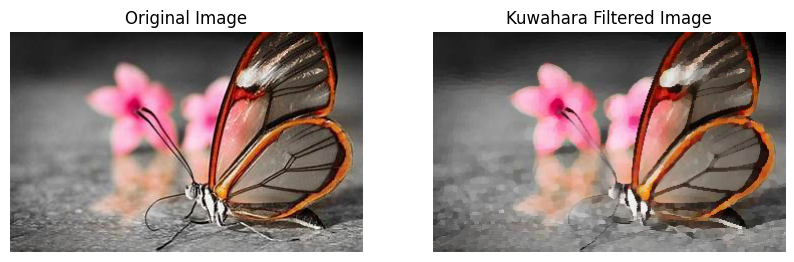

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply Kuwahara filter to each channel separately
def kuwahara_filter(img, kernel_size=5):
    # Padding the image
    pad_size = kernel_size // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')

    rows, cols, _ = img.shape
    output_img = np.zeros_like(img)

    for i in range(rows):
        for j in range(cols):
            for c in range(3):  # Apply filter to each color channel (R, G, B)
                r, co = i + pad_size, j + pad_size
                region = padded_img[r - pad_size:r + pad_size + 1, co - pad_size:co + pad_size + 1, c]
                quadrants = [
                    region[0:pad_size + 1, 0:pad_size + 1],  # Top-left quadrant
                    region[0:pad_size + 1, pad_size:],       # Top-right quadrant
                    region[pad_size:, 0:pad_size + 1],       # Bottom-left quadrant
                    region[pad_size:, pad_size:]             # Bottom-right quadrant
                ]

                # Calculate mean and variance of each quadrant
                means = [np.mean(q) for q in quadrants]
                variances = [np.var(q) for q in quadrants]

                # Select the mean of the region with the smallest variance
                min_var_index = np.argmin(variances)
                output_img[i, j, c] = means[min_var_index]

    return output_img

# Load the image (in color, no grayscale conversion)
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Apply Kuwahara filter
    filtered_img = kuwahara_filter(img, kernel_size=5)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img)
    plt.title('Kuwahara Filtered Image')
    plt.axis('off')

    plt.show()